In [30]:
import pandas as pd

df = pd.read_csv("LungCancer.csv")




In [31]:
print("First 10 rows:")
display(df.head(10))
print("\nDataset Description:")
display(df.describe())

First 10 rows:


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
5,F,58,1,1,1,2,2,2,2,1,2,2,1,1,2,YES
6,F,70,1,1,1,2,2,1,2,2,2,2,2,2,1,YES
7,F,74,2,2,1,1,1,1,2,1,1,1,1,2,1,NO
8,M,77,1,2,1,2,1,1,1,1,2,1,1,1,2,NO
9,F,67,2,2,2,2,1,2,2,1,2,1,2,1,1,NO



Dataset Description:


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [32]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print("\nNumber of duplicates:", df.duplicated().sum())
print(df.head())


Number of duplicates: 0
  GENDER  AGE  SMOKING  ...  SWALLOWING_DIFFICULTY  CHEST_PAIN  LUNG_CANCER
0      M   65        1  ...                      2           1           NO
1      F   55        1  ...                      2           2           NO
2      F   78        2  ...                      1           1          YES
3      M   60        2  ...                      2           2          YES
4      F   80        1  ...                      1           2           NO

[5 rows x 16 columns]


In [33]:
from sklearn.preprocessing import LabelEncoder
columns_to_drop=['ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','GENDER','AGE','ALCOHOL_CONSUMING']
df=df.drop(columns=columns_to_drop)
label_encoder = LabelEncoder()
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])
columns_to_transform = ['SMOKING', 'YELLOW_FINGERS', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']
df[columns_to_transform] = df[columns_to_transform].replace({1: 0, 2: 1})
df.head()

,SMOKING,YELLOW_FINGERS,FATIGUE,ALLERGY,WHEEZING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,0,0,1,1,1,1,1,0,0
1,0,1,1,1,1,0,0,1,1,0
2,1,1,1,0,1,0,1,0,0,1
3,1,0,0,1,0,1,0,1,1,1
4,0,0,1,0,1,0,0,0,1,0


In [34]:
y = df['LUNG_CANCER']
X = df.drop(columns=['LUNG_CANCER'])

feature_column_names = X.columns.tolist()
print("Feature column names (X):")
print(feature_column_names)
print("\nTarget (y):")
print(y.head())

Feature column names (X):
['SMOKING', 'YELLOW_FINGERS', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

Target (y):
0    0
1    0
2    1
3    1
4    0
Name: LUNG_CANCER, dtype: int32


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=9, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNNmodel = KNeighborsClassifier(n_neighbors=10)
KNNmodel.fit(X_train_scaled, y_train)

y_pred_knn = KNNmodel.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))



Accuracy: 0.83


In [37]:
from sklearn.linear_model import LogisticRegression
LGmodel = LogisticRegression()
LGmodel.fit(X_train_scaled, y_train)

y_pred_log = LGmodel.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_log)
print(f" {accuracy }")


 0.87


In [38]:
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

y_pred_gnb = NBmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gnb)
print(f" Accuracy: {accuracy }")


 Accuracy: 0.86


In [39]:


from xgboost import XGBClassifier


XGBmodel = XGBClassifier(eval_metric='mlogloss') 
XGBmodel.fit(X_train, y_train)

y_pred_xgb = XGBmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f" Accuracy: {accuracy }")


 Accuracy: 0.93


In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGBmodel, X_train_scaled, y_train, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.9349999999999999


In [41]:
import numpy as np
my_record = np.array([0, 0, 0, 1, 1, 1, 1, 1, 0]).reshape(1, -1)
	

# 5. Predict the class
prediction = XGBmodel.predict(my_record)
probability = XGBmodel.predict_proba(my_record)

print("Your Record:", my_record)
print("Predicted Class:", prediction[0])
print("Prediction Probabilities:", probability[0])

Your Record: [[0 0 0 1 1 1 1 1 0]]
Predicted Class: 0
Prediction Probabilities: [0.9722024  0.02779757]


In [42]:

import joblib

joblib.dump(XGBmodel, 'lung_cancer_model.pkl')

print("Model saved as lung_cancer_model.pkl")

Model saved as lung_cancer_model.pkl


Lung Cancer Model (XGBoost) AUC Score: 0.9704


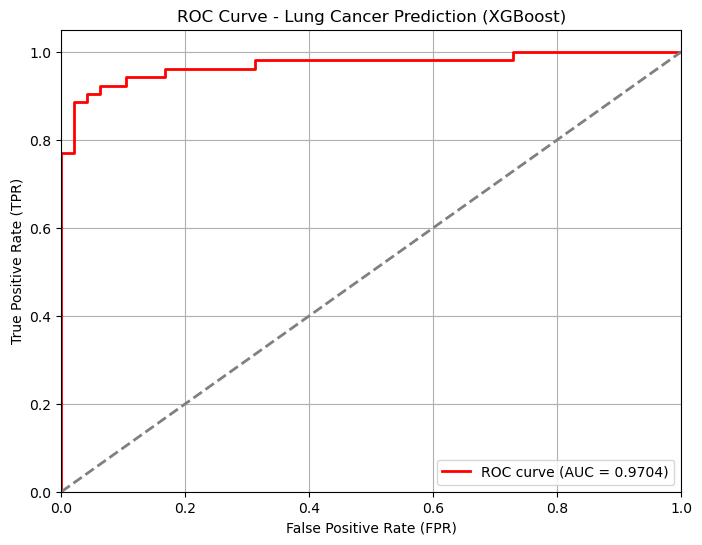

In [43]:


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from xgboost import XGBClassifier

model_to_evaluate = XGBmodel


y_pred_proba = model_to_evaluate.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


roc_auc = auc(fpr, tpr)
print(f"Lung Cancer Model (XGBoost) AUC Score: {roc_auc:.4f}")


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Lung Cancer Prediction (XGBoost)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [44]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


print("="*40)
print("ALL MODEL METRICS FOR LUNG CANCER")
print("="*40)

print("\n--- KNeighbors Classifier (KNN) ---")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")


print("\n--- Logistic Regression ---")
print(classification_report(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log):.4f}")

print("\n--- Gaussian Naive Bayes (GNB) ---")
print(classification_report(y_test, y_pred_gnb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gnb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gnb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gnb):.4f}")

# --- 4. XGBoost Classifier (XGB) Metrics ---
# Assumes y_pred_xgb exists
print("\n--- XGBoost Classifier (XGB) ---")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")



ALL MODEL METRICS FOR LUNG CANCER

--- KNeighbors Classifier (KNN) ---
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        48
           1       0.95      0.71      0.81        52

    accuracy                           0.83       100
   macro avg       0.85      0.83      0.83       100
weighted avg       0.86      0.83      0.83       100

Accuracy: 0.8300
Precision: 0.9487
Recall: 0.7115
F1 Score: 0.8132

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        48
           1       0.93      0.81      0.87        52

    accuracy                           0.87       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100

Accuracy: 0.8700
Precision: 0.9333
Recall: 0.8077
F1 Score: 0.8660

--- Gaussian Naive Bayes (GNB) ---
              precision    recall  f1-score   support

           0       0.